In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tqdm
import itertools
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.utils import *

import librosa, librosa.display
import collections

In [43]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    

In [44]:
cd ..


C:\Users\user\Desktop\CBM 데이터 분석\MEDIUM_NoteBook-master


In [45]:
cd Predictive_Maintenance/

C:\Users\user\Desktop\CBM 데이터 분석\MEDIUM_NoteBook-master\Predictive_Maintenance


In [46]:
label = pd.read_csv('profile.txt', sep='\t', header=None)

In [47]:
label.columns = ['Cooler', 'Valve', 'Pump', 'Accumulator', 'Flag']

In [48]:
label

,Cooler,Valve,Pump,Accumulator,Flag
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1
...,...,...,...,...,...
2200,100,100,0,90,0
2201,100,100,0,90,0
2202,100,100,0,90,0
2203,100,100,0,90,0


In [49]:
pwd

'C:\\Users\\user\\Desktop\\CBM 데이터 분석\\MEDIUM_NoteBook-master\\Predictive_Maintenance'

In [50]:
data = ['TS1.txt', 'TS2.txt', 'TS3.txt', 'TS4.txt']
df = pd.DataFrame()

for txt in data:
    read_df = pd.read_csv(txt, sep='\t', header=None)
    df = df.append(read_df)

print(df.shape)
df.head()

(8820, 60)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,35.570,35.492,35.469,35.422,35.414,35.320,35.227,35.242,35.160,35.176,...,36.008,35.984,35.996,36.039,36.008,36.008,36.094,36.102,36.090,36.152
1,36.156,36.094,35.992,36.008,35.992,35.902,35.824,35.820,35.727,35.727,...,37.328,37.324,37.340,37.332,37.316,37.410,37.418,37.422,37.488,37.477
2,37.488,37.391,37.340,37.312,37.223,37.145,37.059,36.973,36.898,36.879,...,38.457,38.461,38.457,38.469,38.469,38.555,38.527,38.543,38.527,38.621
3,38.633,38.535,38.469,38.379,38.297,38.223,38.125,38.062,37.977,37.969,...,39.441,39.363,39.367,39.457,39.461,39.461,39.473,39.441,39.453,39.461
4,39.461,39.461,39.375,39.281,39.203,39.113,39.043,38.969,38.875,38.883,...,40.324,40.320,40.312,40.340,40.320,40.387,40.391,40.391,40.387,40.391


In [51]:
df = df.sort_index().values.reshape(-1, len(data), len(df.columns)).transpose(0, 2, 1)
df.shape

(2205, 60, 4)

In [52]:
df[2]

array([[37., 35., 39., 42.],
       [37., 35., 39., 42.],
       [37., 35., 39., 42.],
       [37., 35., 39., 42.],
       [37., 35., 39., 42.],
       [37., 35., 39., 42.],
       [37., 35., 39., 42.],
       [37., 35., 39., 42.],
       [37., 35., 39., 42.],
       [37., 35., 39., 42.],
       [37., 35., 39., 42.],
       [37., 35., 39., 42.],
       [37., 35., 39., 42.],
       [37., 35., 39., 42.],
       [37., 35., 39., 42.],
       [37., 35., 39., 42.],
       [37., 35., 39., 42.],
       [37., 35., 39., 42.],
       [37., 35., 40., 42.],
       [38., 35., 40., 42.],
       [38., 35., 40., 42.],
       [38., 36., 40., 42.],
       [38., 36., 40., 42.],
       [38., 36., 40., 42.],
       [38., 36., 40., 42.],
       [38., 36., 40., 42.],
       [38., 36., 40., 42.],
       [38., 36., 40., 42.],
       [38., 36., 40., 42.],
       [38., 36., 40., 42.],
       [38., 36., 40., 42.],
       [38., 36., 40., 42.],
       [38., 36., 40., 43.],
       [38., 36., 40., 42.],
       [38., 3

Text(0.5, 0, 'Time')

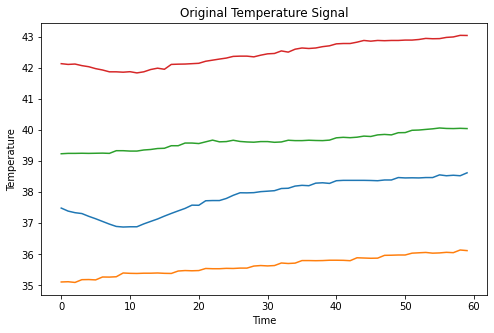

In [53]:
plt.figure(figsize=(8,5))
plt.plot(df[2])
plt.title('Original Temperature Signal')
plt.ylabel('Temperature')
plt.xlabel('Time')
# np.set_printoptions(False)

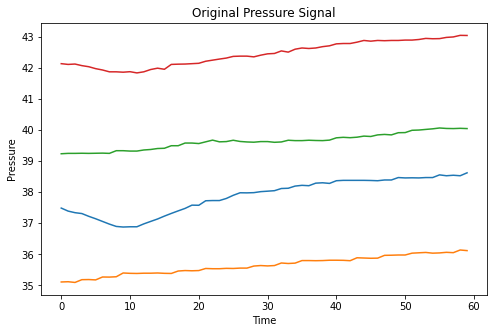

In [54]:
plt.figure(figsize=(8,5))
plt.plot(df[2])
plt.title('Original Pressure Signal')
plt.ylabel('Pressure')
plt.xlabel('Time')
np.set_printoptions(False)

In [55]:
df.shape

(2205, 60, 4)

In [56]:
df = np.clip(np.diff(df, axis=1), -5, 5)
df.shape

(2205, 59, 4)

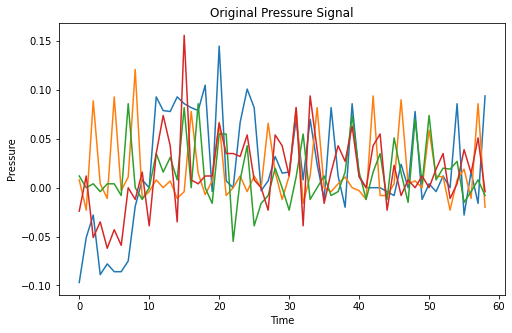

In [57]:
plt.figure(figsize=(8,5))
plt.plot(df[2])
plt.title('Original Pressure Signal')
plt.ylabel('Pressure')
plt.xlabel('Time')
np.set_printoptions(False)

In [58]:
label = label.Accumulator

In [59]:
label.value_counts()

90     808
130    599
115    399
100    399
Name: Accumulator, dtype: int64

In [60]:
diz_label, diz_reverse_label = {}, {}
for i, lab in enumerate(label.unique()):
    diz_label[lab] = i
    diz_reverse_label[i] = label

print(diz_label)
print(diz_reverse_label)
label = label.map(diz_label)
y = to_categorical(label)

{130: 0, 115: 1, 100: 2, 90: 3}
{0: 0       130
1       130
2       130
3       130
4       130
       ... 
2200     90
2201     90
2202     90
2203     90
2204     90
Name: Accumulator, Length: 2205, dtype: int64, 1: 0       130
1       130
2       130
3       130
4       130
       ... 
2200     90
2201     90
2202     90
2203     90
2204     90
Name: Accumulator, Length: 2205, dtype: int64, 2: 0       130
1       130
2       130
3       130
4       130
       ... 
2200     90
2201     90
2202     90
2203     90
2204     90
Name: Accumulator, Length: 2205, dtype: int64, 3: 0       130
1       130
2       130
3       130
4       130
       ... 
2200     90
2201     90
2202     90
2203     90
2204     90
Name: Accumulator, Length: 2205, dtype: int64}


In [64]:
df_spectre = []

for i, sample in enumerate(tqdm.tqdm(df)):
    
    sample_spectre = np.apply_along_axis(lambda x: librosa.feature.melspectrogram(x, sr=40000), 0, sample)
    df_spectre.append(sample_spectre)
    
df_spectre = np.asarray(df_spectre)
df_spectre.shape

  0%|                                                                                         | 0/2205 [00:00<?, ?it/s]C:\Users\user\anaconda3\envs\deeplearn\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=59
  n_fft, y.shape[-1]
100%|██████████████████████████████████████████████████████████████████████████████| 2205/2205 [00:25<00:00, 84.88it/s]


(2205, 128, 1, 4)

In [62]:
isinstance([1,2,, collections.Iterable)

True

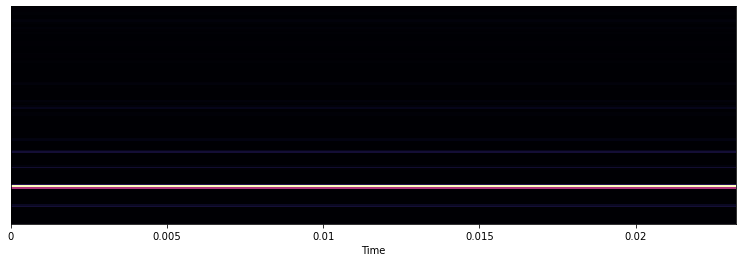

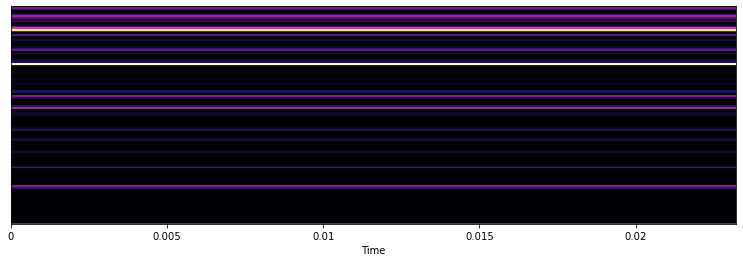

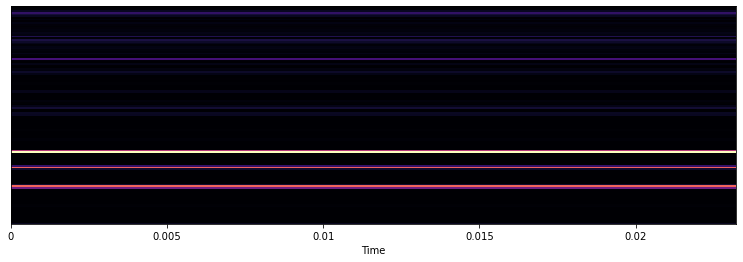

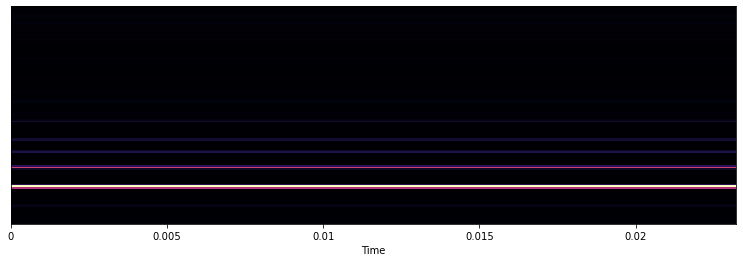

In [67]:
for i in range(len(data)):
    plt.figure(figsize=(13,4))
    librosa.display.specshow(df_spectre[20][:,:,i], x_axis='time')

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df_spectre, y, random_state = 42, test_size=0.2)

In [71]:
def get_model(data):
    
    inp = Input(shape=(data.shape[1], data.shape[2], data.shape[3]))
    
    x = Conv2D(filters = 64, kernel_size=(2,2), padding='same')(inp)
    
    x = Permute((2, 3, 1))(x)
    x = BatchNormalization(axis=-1)(x)
    x = Permute((3, 1, 2))(x)
    
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,1))(x)
    x = Dropout(0.2)(x)
    
    x = Permute((2, 3, 1))(x)
    x = Reshape((data.shape[2], 64*64))(x)
    
    x = Bidirectional(GRU(64, activation='relu', return_sequences=False))(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    out = Dense(y_train.shape[1], activation='softmax')(x)
    
    model = Model(inputs=inp, outputs=out)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [72]:
model = get_model(X_train)

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 1, 4)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 1, 64)        1088      
_________________________________________________________________
permute (Permute)            (None, 1, 64, 128)        0         
___________________________________________________

In [74]:
es = EarlyStopping(monitor='val_acc', mode='auto', restore_best_weights=True, verbose=1, patience=15)
model = get_model(X_train)
model.fit(X_train, y_train, epochs=100, batch_size=256, verbose=2, validation_split=0.1, callbacks=[es])

Train on 1587 samples, validate on 177 samples
Epoch 1/100
1587/1587 - 2s - loss: 1.3619 - acc: 0.3661 - val_loss: 1.3673 - val_acc: 0.4633
Epoch 2/100
1587/1587 - 1s - loss: 1.3005 - acc: 0.4222 - val_loss: 1.3634 - val_acc: 0.4633
Epoch 3/100
1587/1587 - 1s - loss: 1.2090 - acc: 0.4770 - val_loss: 1.3514 - val_acc: 0.4407
Epoch 4/100
1587/1587 - 1s - loss: 1.1511 - acc: 0.4991 - val_loss: 1.3473 - val_acc: 0.4294
Epoch 5/100
1587/1587 - 1s - loss: 1.1099 - acc: 0.5249 - val_loss: 1.3374 - val_acc: 0.4463
Epoch 6/100
1587/1587 - 1s - loss: 1.0742 - acc: 0.5306 - val_loss: 1.3336 - val_acc: 0.4237
Epoch 7/100
1587/1587 - 1s - loss: 1.0232 - acc: 0.5570 - val_loss: 1.3312 - val_acc: 0.4181
Epoch 8/100
1587/1587 - 1s - loss: 1.0083 - acc: 0.5665 - val_loss: 1.3281 - val_acc: 0.4124
Epoch 9/100
1587/1587 - 1s - loss: 0.9737 - acc: 0.5917 - val_loss: 1.3336 - val_acc: 0.4124
Epoch 10/100
1587/1587 - 1s - loss: 0.9533 - acc: 0.5911 - val_loss: 1.3281 - val_acc: 0.4181
Epoch 11/100
1587/1587

In [76]:
pred_test = np.argmax(model.predict(X_test), axis=1)

In [78]:
print(classification_report([diz_reverse_label[np.argmax(label)] for label in y_test], [diz_reverse_label[label] for label in pred_test]))

ValueError: multiclass-multioutput is not supported

In [79]:
cnf_matrix = confusion_matrix([diz_reverse_label[np.argmax(label)] for label in y_test], 
                              [diz_reverse_label[label] for label in pred_test])

plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=list(diz_reverse_label.values()))
plt.show()

ValueError: multiclass-multioutput is not supported